# Sistemas de Recomendacion

1. Pipeline: Tuberia o fila


    * modulo1: 
    
          Selector de caractericticas. 
    
          k-caracteristicas más relevantes.
    
    * Modulo 2: 
            
            Clasificador de bosques aleatorios.
    
2. Vecinos mas cercanos: 


            mirar con respecto a alguna distancia mirar cuales son los vecinos mas cercanos. 

            Algoritmos que divide por medianas: [x1,x2,x3,x4,x5], selecciona un dato de forma aleatoria: x4, coloca los datos <- menores y -> mayores 
            se hace como un a especie de arbol. 

3. Clasificador de vecinos mas cercanos.(K-NN)


        k-vecinos mas cercanos. Me dice cual se parece mas a mi.



# Construccion de un sistema de recomendacion

## Construccion de un *pipeline* (Filtro)

In [1]:
# Importamos las librerias

from sklearn.datasets import samples_generator # generamos un toyset
from sklearn.feature_selection import SelectKBest, f_regression # coger el q realiza la mejor regresion
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Genrar un toyset
# 150 observaciones
# 25 caracteristicas cada 1: 6 sirven (informativas) , ninguna es redundante

# n_samples = observaciones
# n_features = caracteristicas
X,y = samples_generator.make_classification(n_samples = 150,n_features = 25,n_classes = 3, n_informative =6, n_redundant = 0, random_state = 7)

print(y)

[0 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 1 0 1 0 1 2 2 0 0 1 0 1 2 1 0 2 2 1
 1 2 2 2 0 0 0 2 1 1 2 1 0 1 2 2 1 2 0 2 2 0 2 2 0 1 0 2 1 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 1 0 2 2 0 0 0 2 2 2 1 2 0 2 0 2 0 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 1 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 2 2 0 1 1 0
 2 2]


## 1. Pipeline: Tuberia o Filtro

In [3]:
# creamos el primer módulo de pipeline, selector de catacteristicas
selector = SelectKBest(f_regression,k=9)

# Creamos el segundo módulo de pipeline, clasificador BEA
# va a tener, 60 arboles, con 4 ramas o niveles
clasificador = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)

# Creamos la tubería.
pipeline = Pipeline([('selec',selector),('elegido',clasificador)])

# fijamos los parametros
# El mumero de caracteristicas va a se 7 y ya no 9
pipeline.set_params(selec__k = 7, elegido__n_estimators = 30)


# Entrenamos la tuberia
# para hacerlo juiciosos, la forma correcta de hacerlo es separar los datos en train y test
# pipeline.fit(X_train,y)
pipeline.fit(X,y)
# Predecimos las salidas
#salida = pipeline.predict(X_test)
# salida sería y_test
salida = pipeline.predict(X)
print(salida)

# Evaluamos la efectividad o eficiencia
# Score mide la eficiencia entre 0-1
print("El score del pipeline es: ",pipeline.score(X,y))

#----------------------------------------------------------------------------------
# Es carpinteria, cuando se quiere profundizar en los datos

# Revisar las caracteristicas del selector
# named_steps con las caracteristicas que elegimos
status = pipeline.named_steps['selec'].get_support()
print(status)

# Para mostrar las caracteristicas que si sirven o q fueron true
carac_selec = [i for i,x in enumerate(status) if x]
print('Las caracteristicas son las numero: ',carac_selec)
print('Los indices son: ', ' '.join([str(x) for x in carac_selec]))

#-----------------------------------------------------------------------------------------

[0 2 2 0 2 0 2 1 0 1 1 2 2 0 2 2 1 0 0 1 0 2 1 1 2 2 0 0 1 2 1 0 1 0 2 2 1
 1 2 2 2 0 1 0 2 1 2 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 0 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 0 2 2 0 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 0 1 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 2 2 0 0 1 2 0
 2 2]
El score del pipeline es:  0.873333333333
[False False False False  True False False  True  True False False False
  True False  True False False  True False False False False  True False
 False]
Las caracteristicas son las numero:  [4, 7, 8, 12, 14, 17, 22]
Los indices son:  4 7 8 12 14 17 22


## 2. Algoritmo Nearest - Neighbors NN

In [4]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

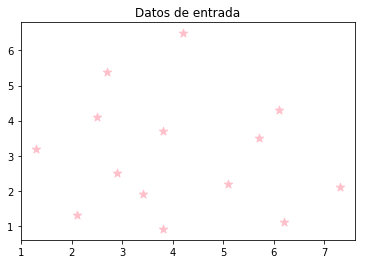

In [5]:
# Creamos un toyset de 2D, Para graficar
X = np.array([[2.1,1.3],[1.3,3.2],[2.9,2.5],[2.7,5.4],[3.8,0.9],[7.3,2.1],[4.2,6.5],[3.8,3.7],[2.5,4.1],[3.4,1.9],[5.7,3.5],[6.1,4.3],[5.1,2.2],[6.2,1.1]])
#print(X)
# Definimos el numero de vecinos 
k = 5
# Creamos una muestra para el test
test = [4.3,2.7]

# ----------------------------------------------------------
# Carpinteria: 
# Graficamos los datos de entrada
plt.figure()
plt.title('Datos de entrada')
plt.scatter( X[:,0] , X[:,1] , marker = '*', s = 75 , color = 'pink' )
plt.show()

# -------------------------------------------------------------

Los k vecinos más cercanos son: 
1 ===> [ 5.1  2.2]
2 ===> [ 3.8  3.7]
3 ===> [ 3.4  1.9]
4 ===> [ 2.9  2.5]
5 ===> [ 5.7  3.5]


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


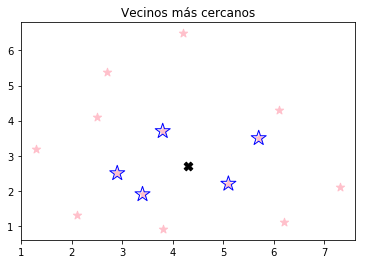

In [6]:
# Creamos el modelo de NN
# el algoritmo para 
modelo_nn = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X)
distancias, indices = modelo_nn.kneighbors(test)

# -----------------------------------------------------------------------------
# imprimimos los vecinos más cercanos más bonitos
print('Los k vecinos más cercanos son: ')
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + ' ===>', X[index])

# Visualizamos el resultado del algoritmo
plt.figure()
plt.title('Vecinos más cercanos')
plt.scatter( X[:,0] , X[:,1] , marker = '*', s = 75 , color = 'pink' )
plt.scatter(X[indices][0][:][:,0] ,  X[indices][0][:][:,1] , marker = '*', s = 250,color = 'blue',facecolors = 'none' )
plt.scatter(test[0],test[1],marker = 'X', s = 75 , color = 'k')
plt.show()

#---------------------------------------------------------------------------- 


## 3. Algortimo para clasificar K-NN

In [7]:
# Cargamos librerías 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm # mapa de color
from sklearn import neighbors, datasets

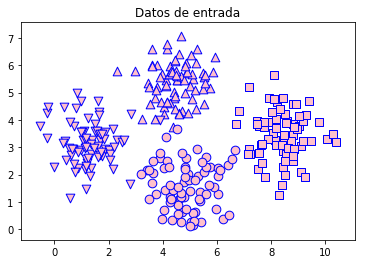

In [8]:
# cargamos los datos
archivo = 'data_knn.txt'
data = np.genfromtxt(archivo,delimiter = ',',skip_header = True)
X,y = data[:,:-1],data[:,-1].astype(np.int)
#print(y)

# ----------------------------------------------------------------------
# Solo para estos datos
plt.figure()
plt.title('Datos de entrada')
marcadores = 'v^os'
# para repetir esta secuencias para llegar al tamaño
mapper = [marcadores[i] for i in y]
#print(mapper)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 75, edgecolors = 'blue', facecolors = 'pink')
plt.show()


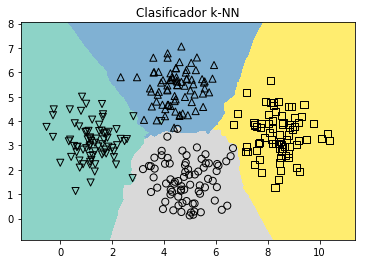

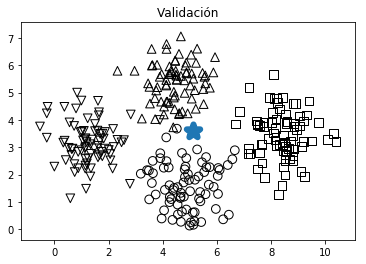

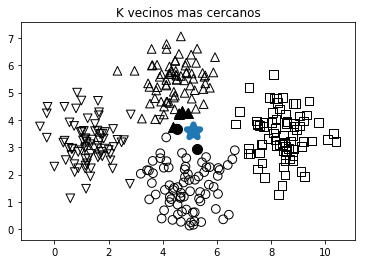

In [17]:
# definir el número de vecinos
NN = 6
# Creamos el clasificador
clasificador = neighbors.KNeighborsClassifier(NN, weights = 'distance')

# Entrenamos el clasificador
clasificador.fit(X,y)

#------------------------------------------------------------------------
# Visualizamos los resultados del clasificador
paso = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, paso),np.arange(y_min, y_max, paso))

# Generamos 
salida = clasificador.predict(np.c_[x_values.ravel(), y_values.ravel()])
salida = salida.reshape(x_values.shape)

# creamos el handle de la figura
plt.figure()

# hacemos la malla
plt.pcolormesh(x_values, y_values, salida, cmap = cm.Set3)

# Graficamos los puntos de entrada
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 50, edgecolor = 'black', facecolors = 'none')
    
# Fijamos los limites de la figura
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Clasificador k-NN')

# creamos un punto de test o validación
test = [5.1,3.6]

# Generamos un nuevo handle
plt.figure()
plt.title('Validación')

# Graficamos los puntos de entrada
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 75, edgecolor = 'black', facecolors = 'none')
    
plt.scatter(test[0], test[1], marker = '*', linewidth = 6, s = 200)

# Extraemos los k vecinos más cercanos
_,indices = clasificador.kneighbors([test])

indices = indices.astype(np.int)[0]

# generamos un nuevo handle para los k vecinos mas cercanos
plt.figure()
plt.title('K vecinos mas cercanos')

# Graficamos los puntos de entrada
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 75, edgecolor = 'black', facecolors = 'none')
    
plt.scatter(test[0], test[1], marker = '*', linewidth = 6, s = 200)
for i in indices:
    plt.scatter(X[i,0], X[i,1], marker = mapper[y[i]], s = 100, facecolors = 'black')

plt.show()

# ------------------------------------------------------------------------------------------

In [18]:
print('Predicción', clasificador.predict([test])[0])

Predicción 1
